# Profile_based computation of load cases 


load the general room type dependent demands and the specific building demands

In [1]:
import matplotlib.pyplot as plt
from load_case_clustering import load_yaml, compute_required_volume_flows, merge_rooms, cluster_time_slots_by_q, analyze_cluster_quality, compute_theoretical_max_q_per_zone, add_max_load_case

standard_data = load_yaml("../src/load_case_clustering/data/general.yml")
gpz_data = load_yaml("input_files/GPZ.yml")

compute the volume flows and merge rooms

In [2]:
df = compute_required_volume_flows(standard_data, gpz_data, overview_flag=True, include_revision=False)
df = merge_rooms(df, gpz_data)

analyse for various number of load cases. This Figure is identical to xy from xy.

Best Silhouette value for 5 load cases


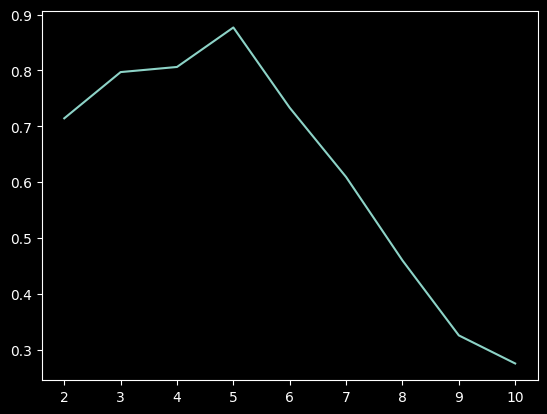

In [3]:
analysis = analyze_cluster_quality(df, 10)

plt.plot(analysis["silhouette"].keys(), analysis["silhouette"].values())

best_k = max(analysis["silhouette"], key=analysis["silhouette"].get)
print(f"Best Silhouette value for {best_k} load cases")

Compute time shares of the load cases (by specifying a number of load cases)

In [4]:
load_cases, time_shares = cluster_time_slots_by_q(df, 5)

add the maximal load case with frequency of 0 %

In [5]:
max_load_case = compute_theoretical_max_q_per_zone(standard_data, gpz_data, False)
load_cases, time_shares = add_max_load_case(max_load_case, load_cases, time_shares)

Resulting load cases. The x-ticks refer to the scenario and the room number

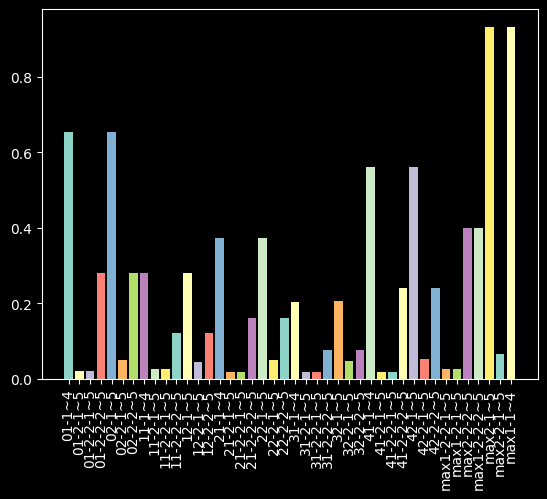

In [7]:
for i in load_cases.keys():
    for j in load_cases[i].keys():
        plt.bar(str(i)+str(j), load_cases[i][j]/3600)

_ = plt.xticks(rotation=90)

In [10]:
out_dict = {"load_cases": load_cases,
            "time_share": time_shares}

In [11]:
from load_case_clustering import save_scenario_data_to_yaml

save_scenario_data_to_yaml(out_dict, "output_files/GPZ_profile_based_load_cases.yml")